In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df_cities = pd.read_csv("cities.csv")
df_providers = pd.read_csv("providers.csv")
df_stations = pd.read_csv("stations.csv")
df_ticket = pd.read_csv("ticket_data.csv")

### Tout d'abord on regarde à quoi ressemble nos dataframes

In [134]:
# les villes desservies par tictactrip
df_cities

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.654250,3.047690,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.450100,30.523400,NaN
8037,11144,"Brighton, England, UK",brighton,50.822000,-0.137400,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.493000,-0.462100,NaN


In [135]:
df_cities.isnull().sum()

id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64

In [136]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8040 non-null   int64  
 1   local_name   8040 non-null   object 
 2   unique_name  8039 non-null   object 
 3   latitude     8040 non-null   float64
 4   longitude    8040 non-null   float64
 5   population   369 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 377.0+ KB


In [137]:
# Création d'un graphe pour visualiser le 5 villes avec le plus de population. (C'est assez loin de la réalité car il y avait bcp de valeur Nan dans la colonne population)
df_cities = df_cities.dropna(axis = 0)
top5_population = df_cities.drop(labels=["id","unique_name","latitude","longitude"], axis=1)
top5_population = top5_population.sort_values('population', ascending=False).head()
populations = top5_population['population'].tolist()
local_name = top5_population['local_name'].tolist()

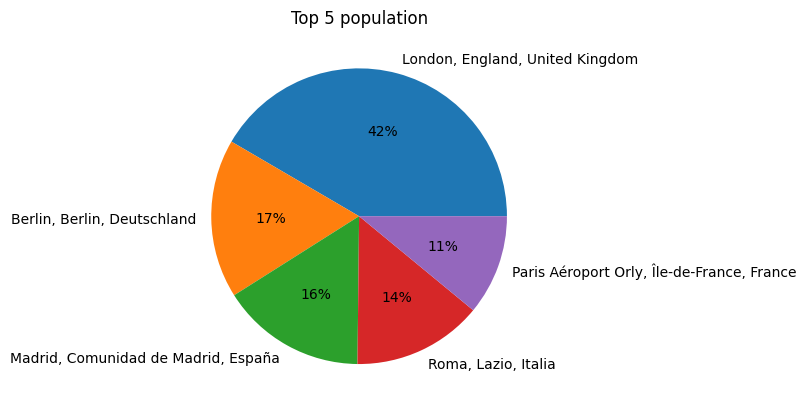

In [138]:
fig, ax = plt.subplots()
ax.pie(populations, labels=local_name, autopct='%1.0f%%')
ax.set_title("Top 5 population")
plt.show()

In [139]:
# infos sur les différents providers
df_providers

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


<Axes: >

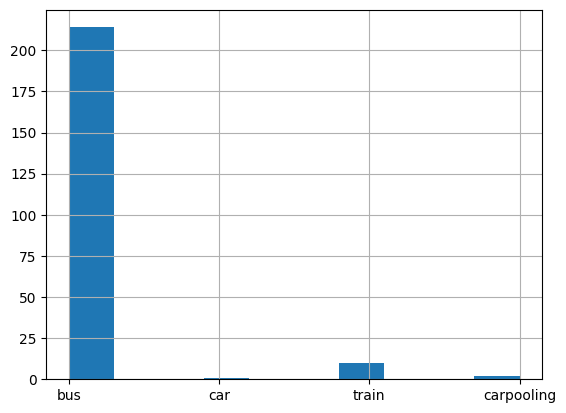

In [140]:
# Pour savoir la répartition des type de transport
df_providers['transport_type'].hist()

In [9]:
df_providers.transport_type.value_counts()

bus           214
train          10
carpooling      2
car             1
Name: transport_type, dtype: int64

In [10]:
df_providers.isnull().sum()

id                       0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

In [11]:
df_providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    227 non-null    int64 
 1   company_id            227 non-null    int64 
 2   provider_id           213 non-null    object
 3   name                  227 non-null    object
 4   fullname              227 non-null    object
 5   has_wifi              224 non-null    object
 6   has_plug              224 non-null    object
 7   has_adjustable_seats  224 non-null    object
 8   has_bicycle           224 non-null    object
 9   transport_type        227 non-null    object
dtypes: int64(2), object(8)
memory usage: 17.9+ KB


In [12]:
# ici je supprime les Nan car je ne pourrais pas convertir la colonne provider_id en int par la suite
df_providers = df_providers.dropna(axis=0)

In [13]:
# Nous pouvons voir que certain provider_id ne sont pas des int, cela va nous gener pour la suite nous allons les remplacer par des int
df_providers['provider_id'].unique()

array(['31', '33', '37', '41', '45', '47', '49', '57', '65', '77', '81',
       '83', '85', '111', '115', '129', '141', '149', '151', '159', '161',
       '163', '165', '167', '169', '171', '173', '179', '181', '185',
       '189', '195', '203', '205', '207', '209', '213', '215', '217',
       '219', '221', '223', '227', '229', '267', '269', '271', '285',
       '289', '291', '293', '295', '297', '299', '301', '303', '307',
       '315', '319', '321', '323', '325', '327', '329', '331', '333',
       '335', '337', '339', '341', '343', '345', '347', '349', '351',
       '353', '355', '357', '359', '361', '363', '365', '367', '369',
       '371', '373', '375', '377', '379', '381', '383', '385', '387',
       '389', '391', '393', '395', '397', '399', '401', '403', '405',
       '407', '409', '411', '413', '415', '417', '419', '421', '423',
       '425', '427', '429', '431', '433', '435', '437', '439', '441',
       '443', '445', '447', '449', '451', '453', '455', '457', '459',
       '461'

In [14]:
df_providers['provider_id'] = df_providers['provider_id'].replace(['I', 'E','M'], [1000,2000,3000])

<ipython-input-14-46ede5ac02bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_providers['provider_id'] = df_providers['provider_id'].replace(['I', 'E','M'], [1000,2000,3000])


In [15]:
df_providers['provider_id'] = df_providers['provider_id'].apply(lambda x: int(x))

<ipython-input-15-baa7dcabe0a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_providers['provider_id'] = df_providers['provider_id'].apply(lambda x: int(x))


In [16]:
# les stations desservies par tictactrip
df_stations

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.146922,-8.611122
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.804102,12.597110
11032,11034,Sants,41.379892,2.139462
11033,11035,Vozilici D66,45.157136,14.164140


In [17]:
df_stations.isnull().sum()

id             0
unique_name    0
latitude       0
longitude      0
dtype: int64

In [18]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035 entries, 0 to 11034
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11035 non-null  int64  
 1   unique_name  11035 non-null  object 
 2   latitude     11035 non-null  float64
 3   longitude    11035 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 345.0+ KB


In [19]:
# Contenant un historique de ticket
df_ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [20]:
df_ticket.isnull().sum()

id                     0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

In [21]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


### Extraire des infos intéressantes 

In [22]:
# Ici on créer une colonne pour afficher le prix en dollards et ensuite je supprime la colonne prix en cents car nous n'allons pas l'utiliser par la suite
df_ticket['price_in_dollars'] = df_ticket['price_in_cents'] / 100
df_ticket = df_ticket.drop(["price_in_cents"], axis=1)

In [23]:
df_ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,search_ts,middle_stations,other_companies,o_city,d_city,price_in_dollars
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,45.5
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,14.5
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,74.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,135.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,77.1
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,25.9
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,27.0
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,30.0
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,28.8


In [24]:
# Ici nous regardons quelques statistiques pour la colonne price in dollars
# Nous pouvons voir le prix min, max et la moyenne
df_ticket["price_in_dollars"].describe()

count    74168.000000
mean        43.827111
std         37.393254
min          3.000000
25%         19.000000
50%         33.500000
75%         52.500000
max        385.500000
Name: price_in_dollars, dtype: float64

In [25]:
# Convertir les colonnes "departure_ts" et "arrival_ts" en objets datetime
df_ticket["departure_ts"] = pd.to_datetime(df_ticket["departure_ts"])
df_ticket["arrival_ts"] = pd.to_datetime(df_ticket["arrival_ts"])

In [26]:
# Calculer la durée du trajet en soustrayant "departure_ts" de "arrival_ts"
df_ticket["travel_time"] = df_ticket["arrival_ts"] - df_ticket["departure_ts"]


In [27]:
df_ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,search_ts,middle_stations,other_companies,o_city,d_city,price_in_dollars,travel_time
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,45.5,0 days 06:10:00
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,14.5,0 days 17:50:00
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,74.0,1 days 07:57:00
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,135.0,0 days 21:35:00
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,77.1,0 days 21:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,25.9,0 days 13:30:00
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,27.0,0 days 06:30:00
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,30.0,0 days 06:45:00
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,28.8,0 days 07:45:00


In [28]:
# Ici nous regardons quelques statistiques pour la colonne travel_time
df_ticket["travel_time"].describe()

count                        74168
mean     0 days 07:04:37.247600043
std      0 days 09:54:58.881351022
min                0 days 00:20:00
25%                0 days 03:00:00
50%                0 days 04:50:00
75%                0 days 08:00:00
max               20 days 12:51:00
Name: travel_time, dtype: object

In [29]:
# Ici mon but est de joindre la table cities et tickets pour connaitre le nom de la ville de depart et d'arrivée et non juste leur id
merged_df = pd.merge(df_ticket, df_cities, left_on='o_city', right_on='id')
merged_df = merged_df.drop(labels=['id_y', 'latitude', 'longitude', 'population', 'unique_name'], axis=1)
merged_df = merged_df.rename(columns={'local_name': 'o_city_name'})

In [30]:
merged_df_2 = pd.merge(merged_df, df_cities, left_on='d_city', right_on='id')
merged_df_2 = merged_df_2.drop(labels=['id', 'latitude', 'longitude', 'population', 'unique_name'], axis=1)
merged_df_2 = merged_df_2.rename(columns={'local_name': 'd_city_name'})

In [31]:
# Ici mon but est de joindre la table merged_df_2 et df_providers pour connaitre le type de transport de chaque trajet
merged_df_final = pd.merge(merged_df_2, df_providers, left_on='company', right_on='provider_id')
merged_df_final = merged_df_final.drop(labels=['id', 'company_id', 'name', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle'], axis=1)

In [32]:
merged_df_final

,id_x,company,o_station,d_station,departure_ts,arrival_ts,search_ts,middle_stations,other_companies,o_city,d_city,price_in_dollars,travel_time,o_city_name,d_city_name,provider_id,fullname,transport_type
0,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,14.50,0 days 17:50:00,"Orléans, Centre-Val de Loire, France","Montpellier, Occitanie, France",9,Intercités,train
1,6797849,9,279.0,1044.0,2017-10-06 11:10:00+00:00,2017-10-07 06:55:00+00:00,2017-10-02 09:14:47.996+00,"{149,418}",{13},628,542,18.50,0 days 19:45:00,"Paris, Île-de-France, France","Montpellier, Occitanie, France",9,Intercités,train
2,6797852,9,848.0,1044.0,2017-10-06 23:40:00+00:00,2017-10-07 20:05:00+00:00,2017-10-02 09:14:47.996+00,"{433,9751}",{13},628,542,28.00,0 days 20:25:00,"Paris, Île-de-France, France","Montpellier, Occitanie, France",9,Intercités,train
3,6799520,9,279.0,1044.0,2017-10-06 11:10:00+00:00,2017-10-07 06:55:00+00:00,2017-10-02 17:53:20.699+00,"{149,418}",{13},628,542,18.50,0 days 19:45:00,"Paris, Île-de-France, France","Montpellier, Occitanie, France",9,Intercités,train
4,6799523,9,848.0,1044.0,2017-10-06 23:40:00+00:00,2017-10-07 20:05:00+00:00,2017-10-02 17:53:20.699+00,"{433,9751}",{13},628,542,32.00,0 days 20:25:00,"Paris, Île-de-France, France","Montpellier, Occitanie, France",9,Intercités,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,6855008,9,2246.0,468.0,2017-10-27 18:20:00+00:00,2017-10-28 11:25:00+00:00,2017-10-16 18:05:58.928+00,"{279,279}",{13},1885,440,46.90,0 days 17:05:00,"Lannemezan, Occitanie, France","Lens, Hauts-de-France, France",9,Intercités,train
3560,6842611,33,1525.0,279.0,2017-10-27 06:00:00+00:00,2017-10-29 05:30:00+00:00,2017-10-12 21:41:02.9+00,"{1187,1187}",{13},162,628,163.95,1 days 23:30:00,"Bucharest, Bucharest, România","Paris, Île-de-France, France",33,Berlin Linien Bus,bus
3561,6814543,173,561.0,585.0,2017-10-07 20:00:00+00:00,2017-10-08 14:30:00+00:00,2017-10-06 19:24:13.691+00,"{10884,279}",{13},467,485,41.30,0 days 18:30:00,"London, England, United Kingdom","Lyon, Auvergne-Rhône-Alpes, France",173,BIGSIM Halilovic,bus
3562,6844199,173,561.0,526.0,2017-10-14 08:00:00+00:00,2017-10-15 08:35:00+00:00,2017-10-13 15:52:17.613+00,"{10884,3}",{13},467,843,71.40,1 days 00:35:00,"London, England, United Kingdom","Toulon, Provence-Alpes-Côte d'Azur, France",173,BIGSIM Halilovic,bus


In [144]:
# C'est assez dommage car en enlevant les Nan de df_providers nous avons perdu 2 type de transport.
# Ici nous pouvons voir le prix moyen suivant le type de transport
merged_df_final.groupby(['transport_type']).mean().loc[:, 'price_in_dollars']

transport_type
bus      78.73500
train    33.33039
Name: price_in_dollars, dtype: float64

In [34]:
merged_df_final['transport_type'].value_counts()

train    3560
bus         4
Name: transport_type, dtype: int64

<Axes: >

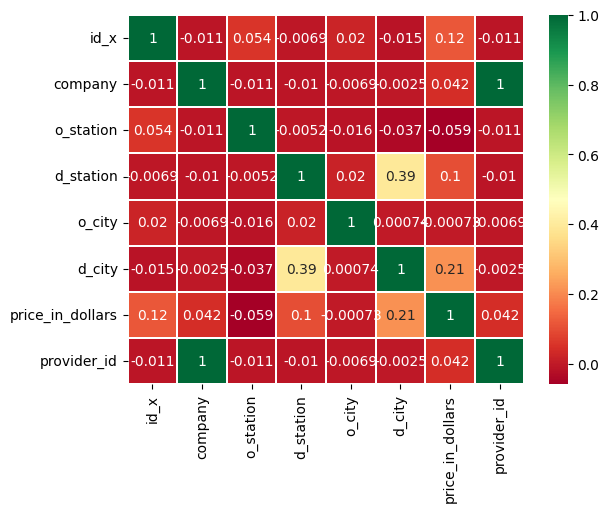

In [35]:
sns.heatmap(merged_df_final.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)